In [144]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.utils.class_weight import compute_sample_weight

from utils import show_distribution
from utils.parameters import LABELS_NAMES

DATA_DIR = Path("data/CMU-MOSEI")
LABELS_DIR = DATA_DIR / "Labels"
AUDIO_DIR = DATA_DIR / "Audio_chunk"

CLASSES_NAMES = ['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']

train_mod_csv = pd.read_csv(LABELS_DIR / "Data_Train_modified.csv")
val_mod_csv = pd.read_csv(LABELS_DIR / "Data_Val_modified.csv")
test_mod_csv = pd.read_csv(LABELS_DIR / "Data_Test_modified.csv")

val_orig_csv = pd.read_csv(LABELS_DIR / "Data_Val_original_without_neg_time.csv")
test_orig_csv = pd.read_csv(LABELS_DIR / "Data_Test_original_without_neg_time.csv")

In [145]:
info = None
for label_name in LABELS_NAMES:
    train_mod_csv.loc[train_mod_csv[label_name] > 0, label_name] = 1
    train_mod_csv[label_name] = train_mod_csv[label_name].astype(int)
    info = pd.concat([info, train_mod_csv[label_name].value_counts()], axis=1)

In [146]:
info

,anger,disgust,fear,happy,sad,surprise
0,12752,13321,14947,7576,12009,14633
1,3522,2953,1327,8698,4265,1641


In [147]:
info[LABELS_NAMES].iloc[0].values / info[LABELS_NAMES].iloc[1].values

array([ 3.62067007,  4.51100576, 11.26375283,  0.87100483,  2.81570926,
        8.91712371])

In [114]:
info = None
for label_name in LABELS_NAMES:
    test_mod_csv.loc[test_mod_csv[label_name] > 0, label_name] = 1
    test_mod_csv[label_name] = test_mod_csv[label_name].astype(int)
    info = pd.concat([info, test_mod_csv[label_name].value_counts()], axis=1)

In [115]:
info[LABELS_NAMES]

,anger,disgust,fear,happy,sad,surprise
0,3582,3848,4268,2152,3524,4213
1,1071,805,385,2501,1129,440


In [116]:
list(info[LABELS_NAMES].to_dict().values())

[{0: 3582, 1: 1071},
 {0: 3848, 1: 805},
 {0: 4268, 1: 385},
 {0: 2152, 1: 2501},
 {0: 3524, 1: 1129},
 {0: 4213, 1: 440}]

In [135]:
info[LABELS_NAMES]

,anger,disgust,fear,happy,sad,surprise
0,3582,3848,4268,2152,3524,4213
1,1071,805,385,2501,1129,440


In [137]:
info[LABELS_NAMES].iloc[0].values / info[LABELS_NAMES].iloc[1].values

array([ 3.34453782,  4.78012422, 11.08571429,  0.86045582,  3.12134632,
        9.575     ])

In [80]:
train_mod_csv[CLASSES_NAMES].corr()

,anger,disgust,fear,happy,sad,surprise
anger,1.000000,0.441812,-0.006364,-0.236727,0.045007,0.037866
disgust,0.441812,1.000000,-0.019122,-0.208976,0.195926,0.128181
fear,-0.006364,-0.019122,1.000000,-0.042105,0.129027,0.027727
happy,-0.236727,-0.208976,-0.042105,1.000000,-0.261910,0.034623
sad,0.045007,0.195926,0.129027,-0.261910,1.000000,0.036160
surprise,0.037866,0.128181,0.027727,0.034623,0.036160,1.000000


In [82]:
train_mod_csv[['anger', 'disgust']].corr()

,anger,disgust
anger,1.000000,0.441812
disgust,0.441812,1.000000


In [83]:
train_mod_csv[['fear', 'sad']].corr()

,fear,sad
fear,1.000000,0.129027
sad,0.129027,1.000000


In [84]:
train_mod_csv[["happy", 'anger', 'disgust', "sad"]].corr()

,happy,anger,disgust,sad
happy,1.000000,-0.236727,-0.208976,-0.261910
anger,-0.236727,1.000000,0.441812,0.045007
disgust,-0.208976,0.441812,1.000000,0.195926
sad,-0.261910,0.045007,0.195926,1.000000


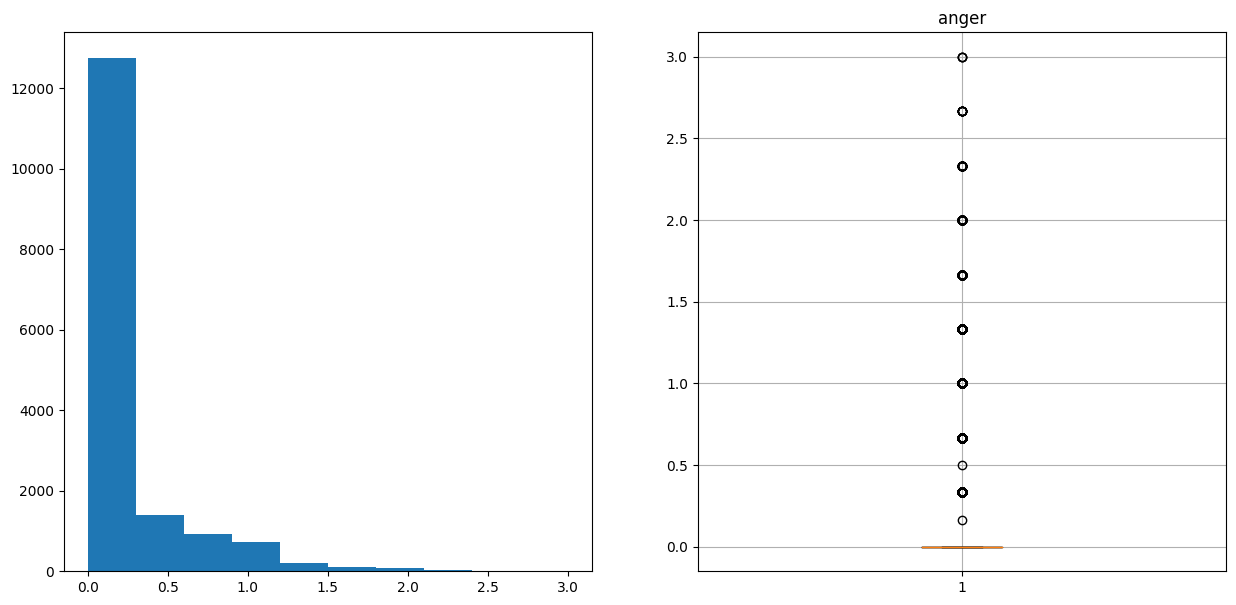

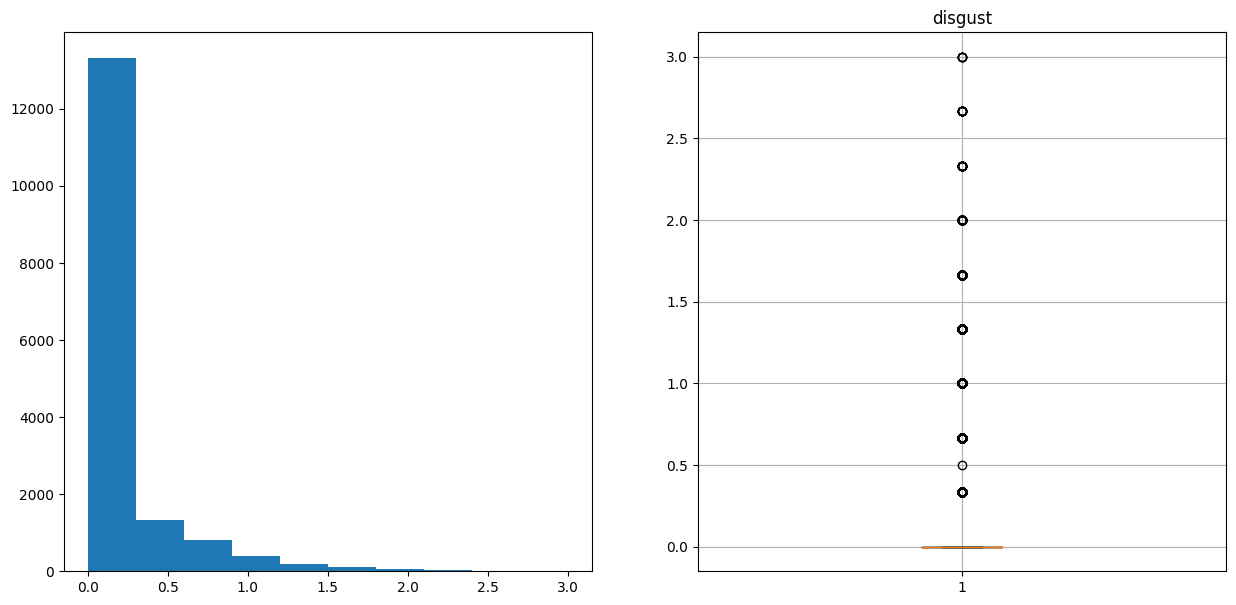

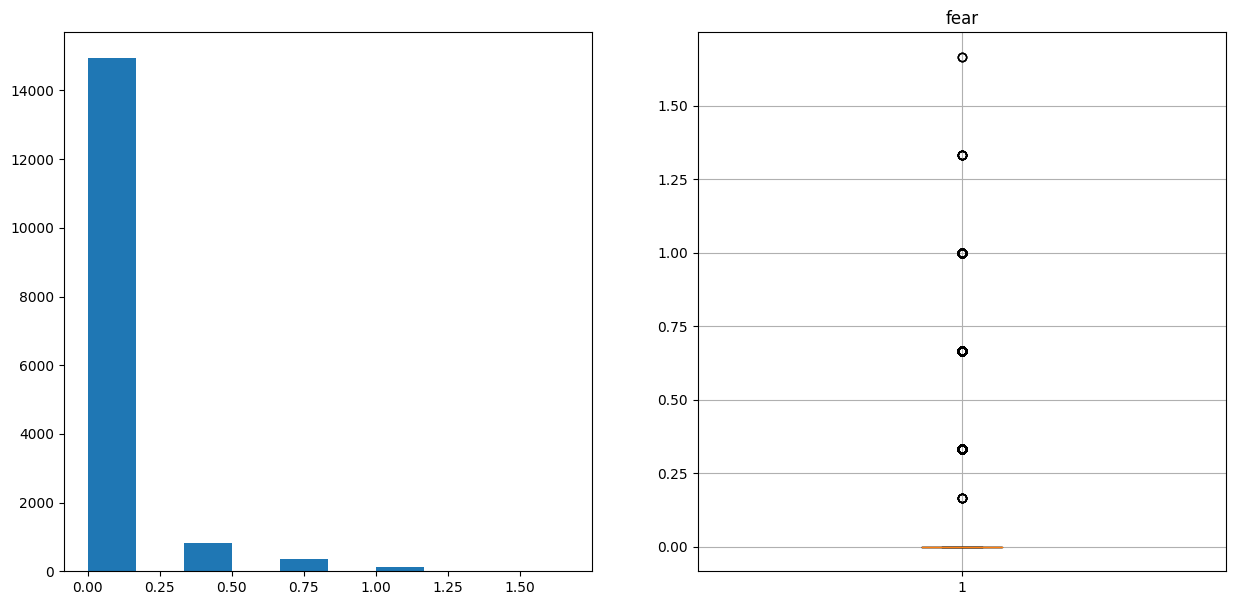

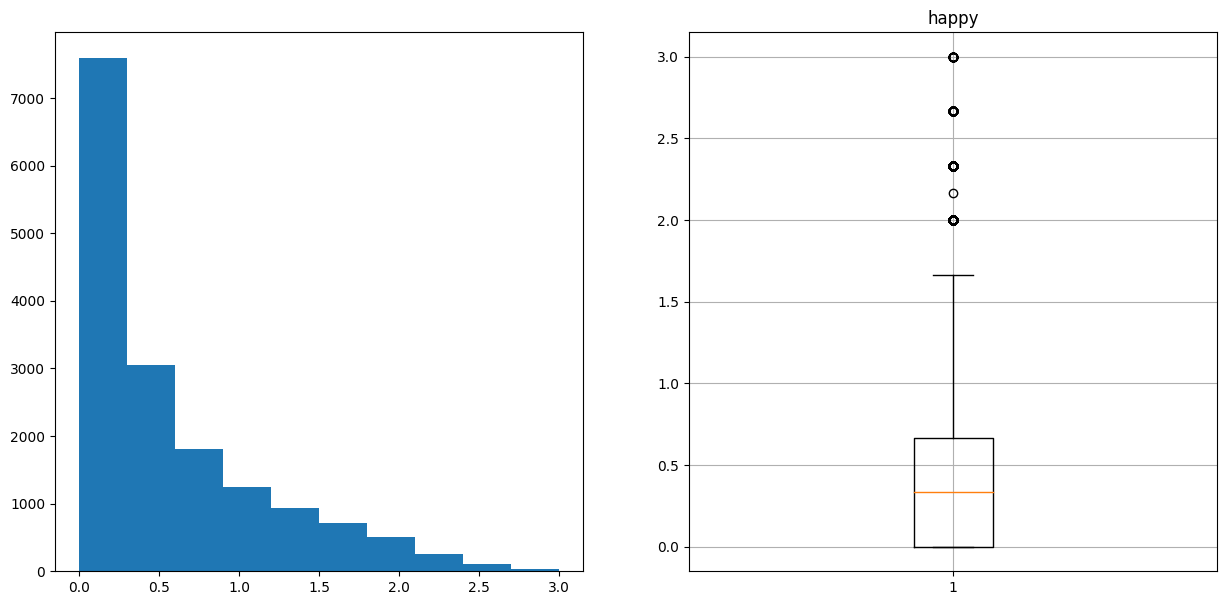

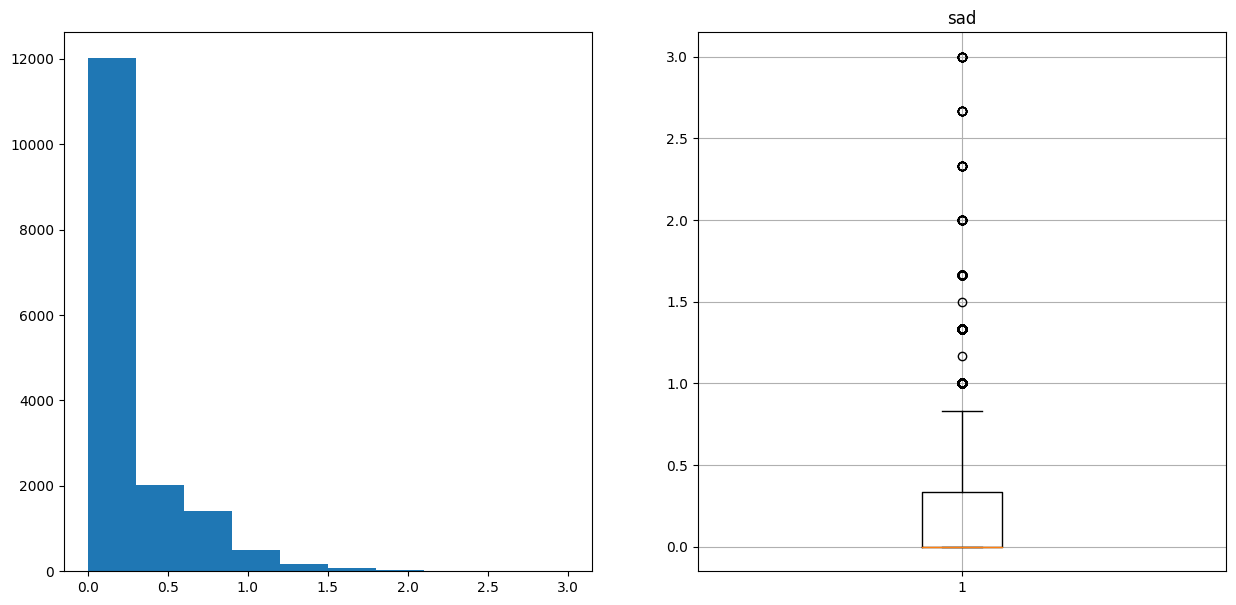

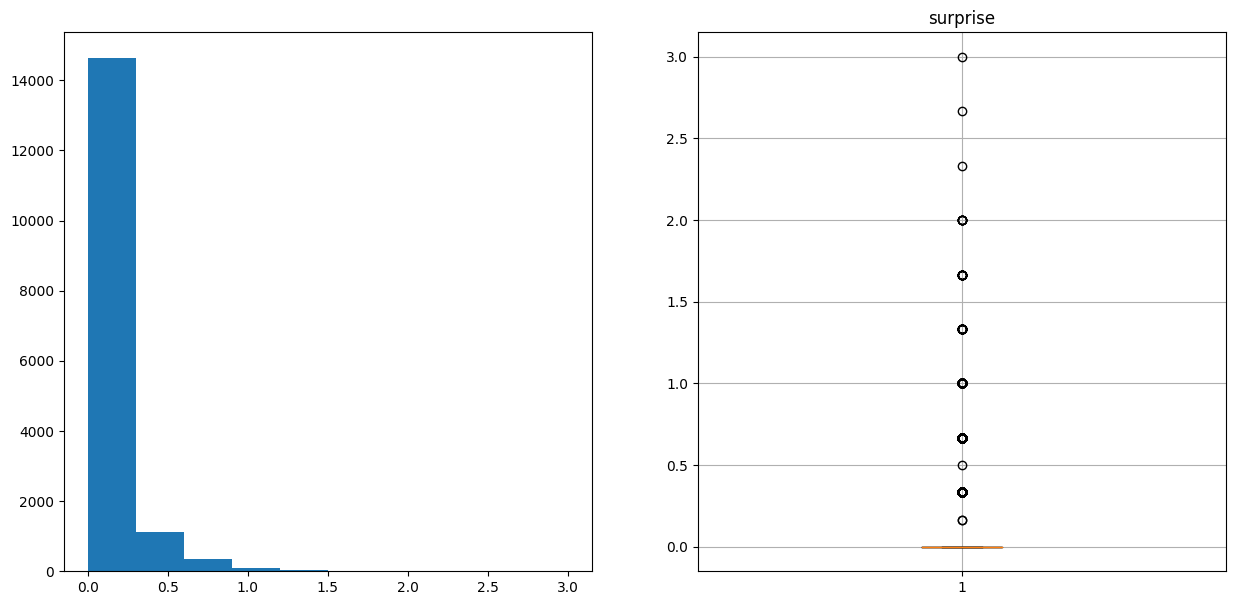

In [85]:
for class_name in CLASSES_NAMES:
    show_distribution(train_mod_csv, class_name)

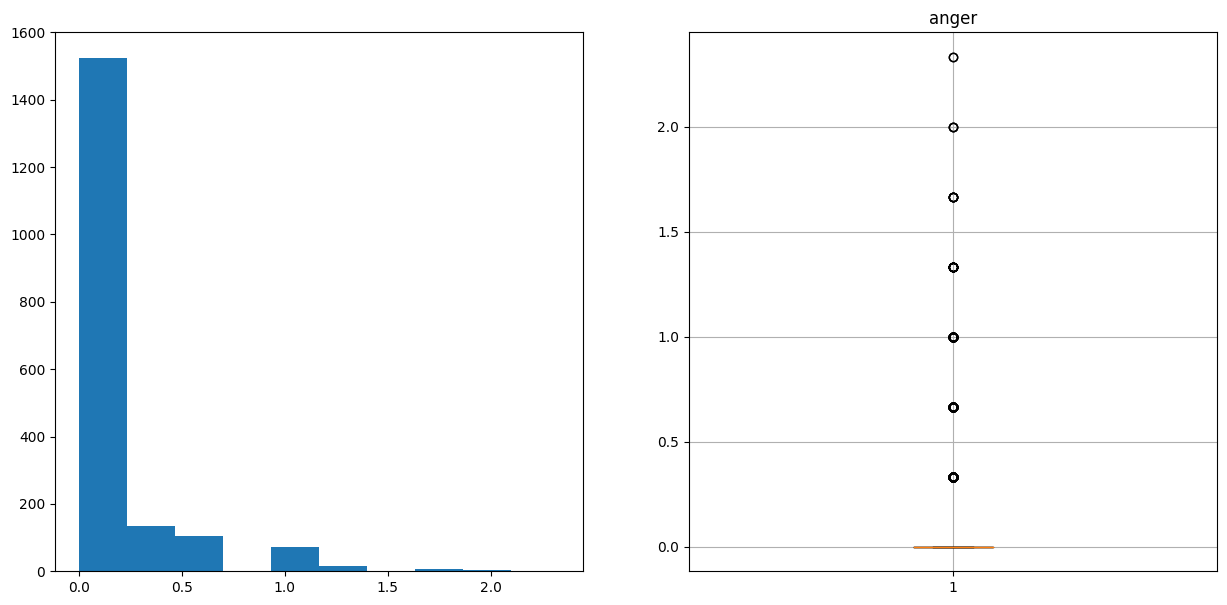

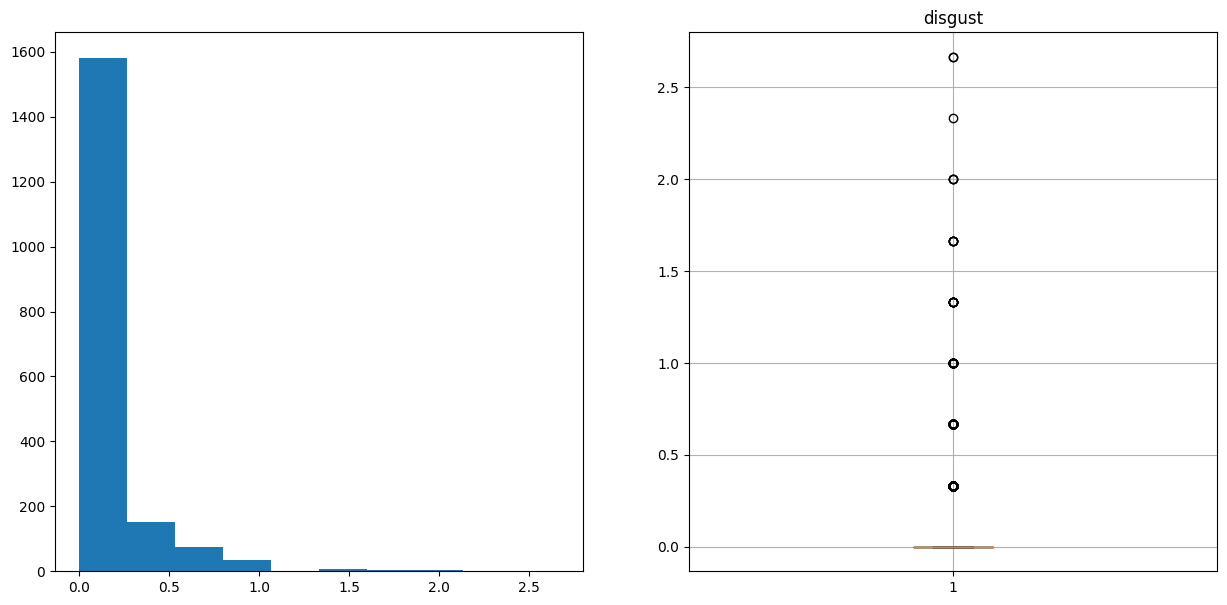

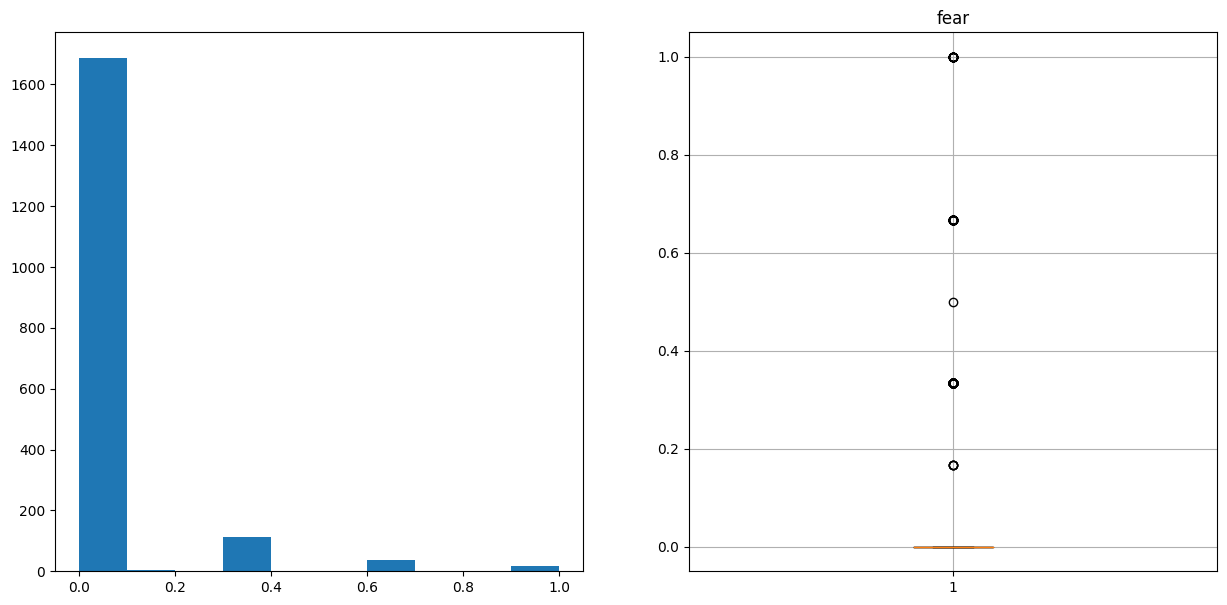

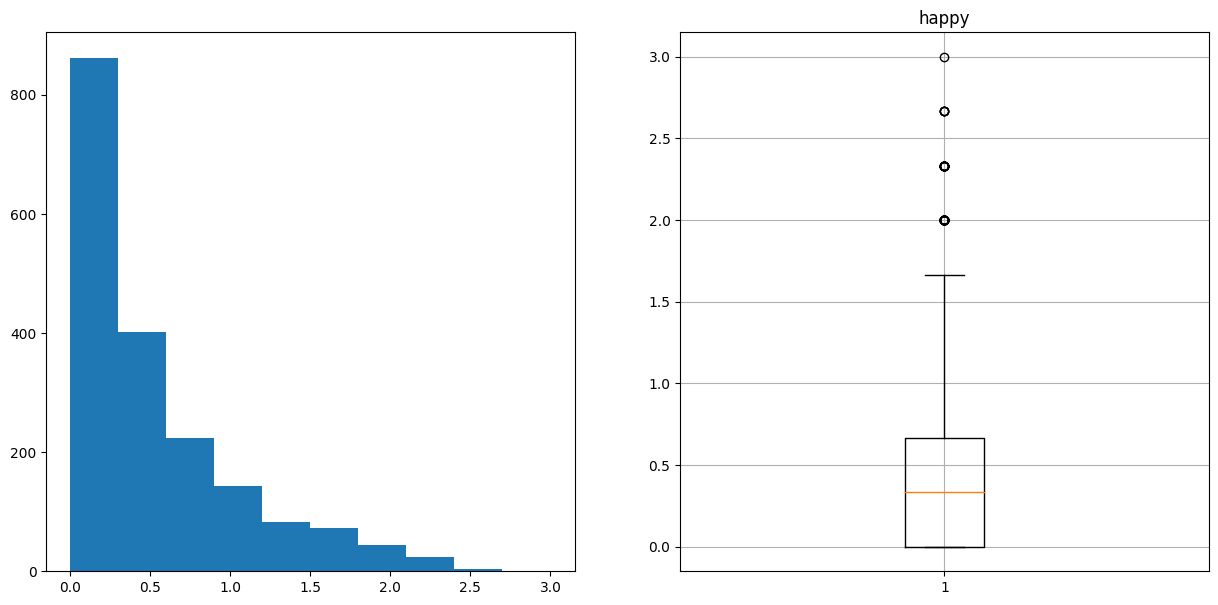

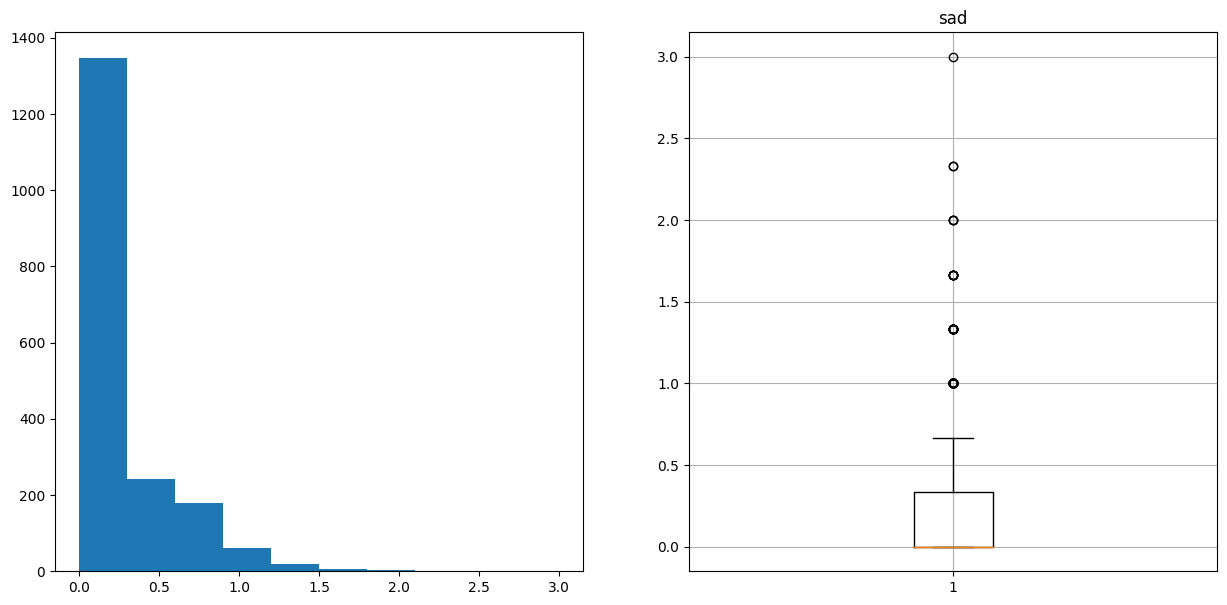

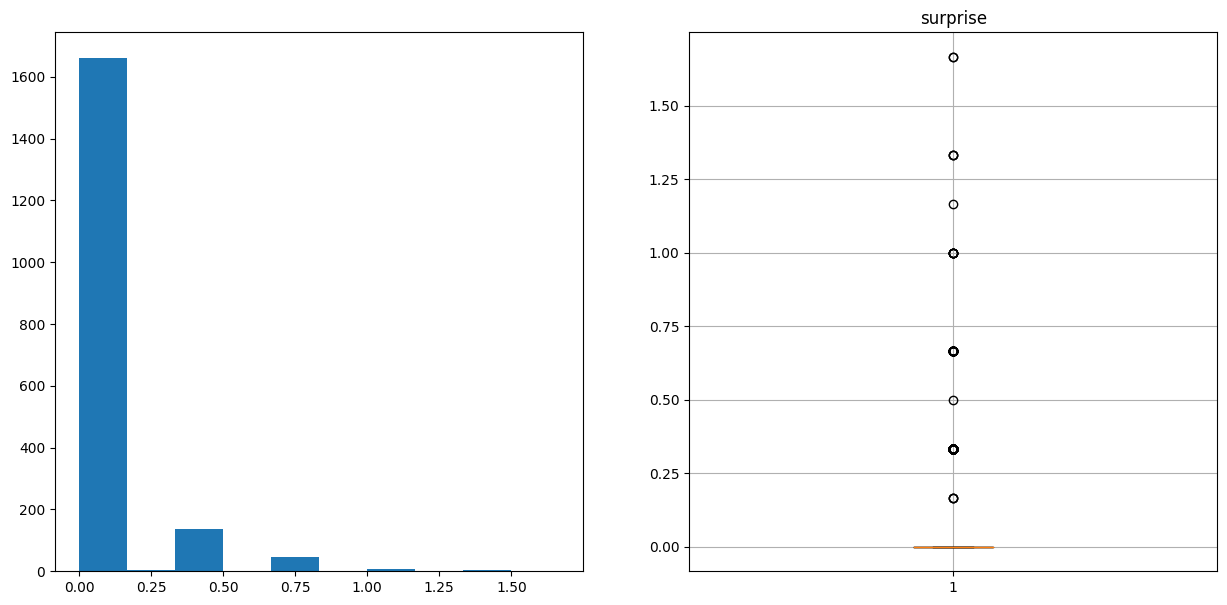

In [86]:
for class_name in CLASSES_NAMES:
    show_distribution(val_mod_csv, class_name)

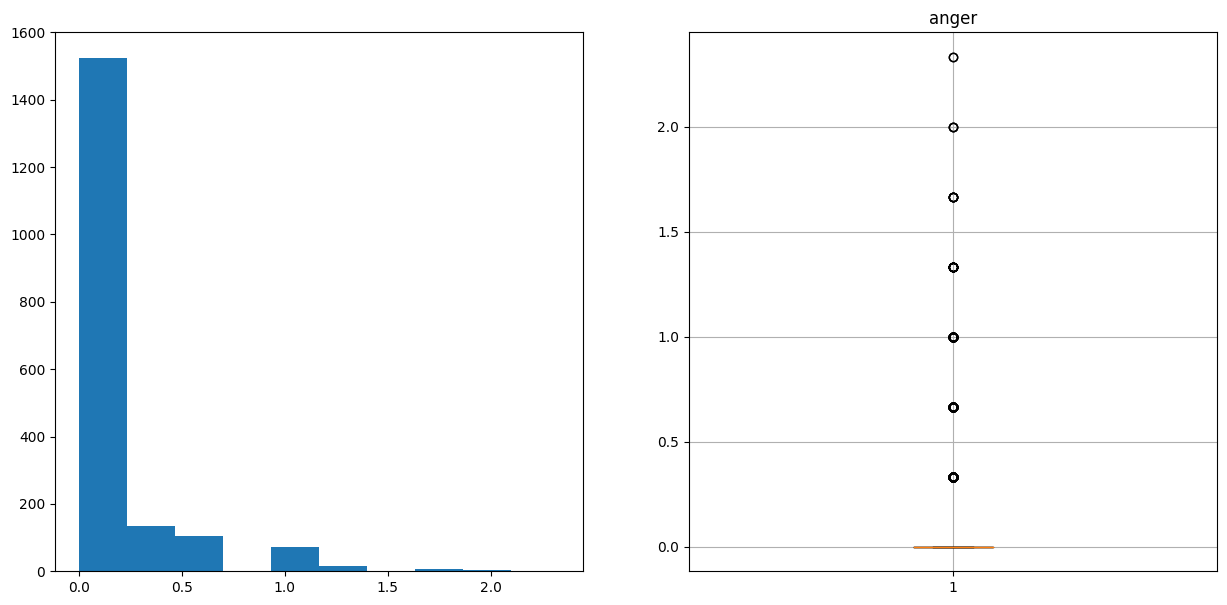

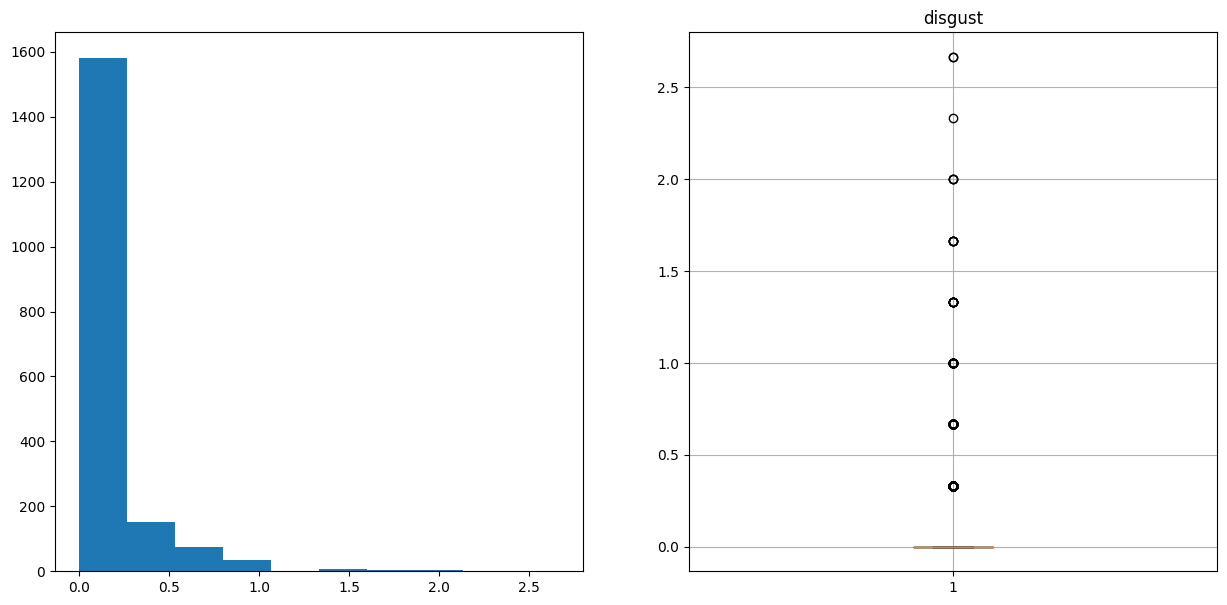

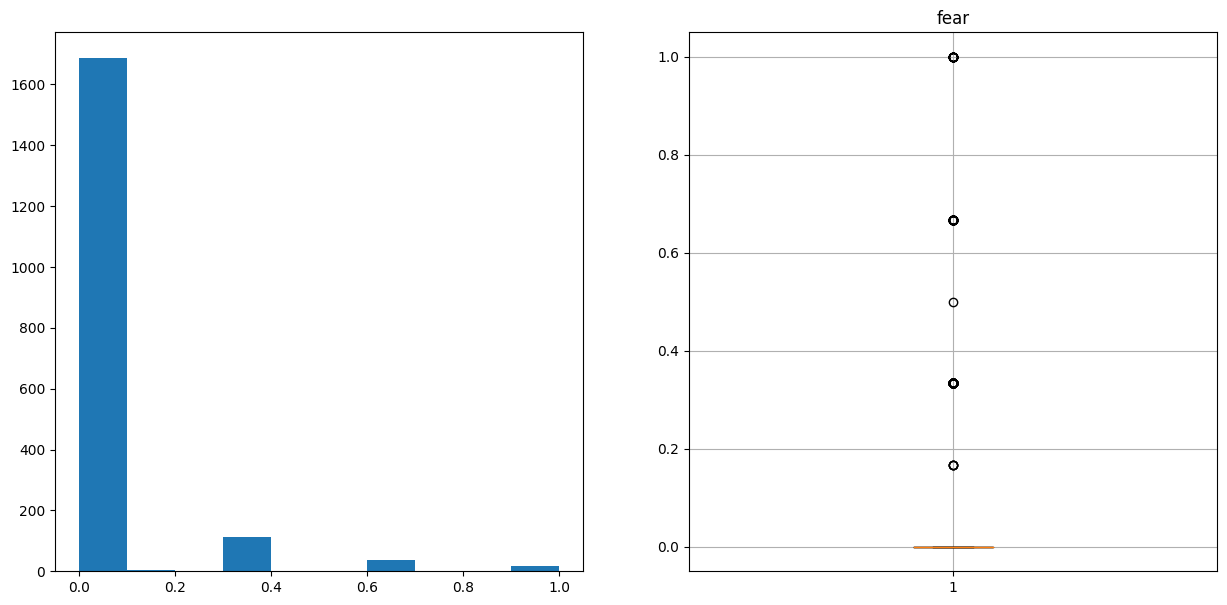

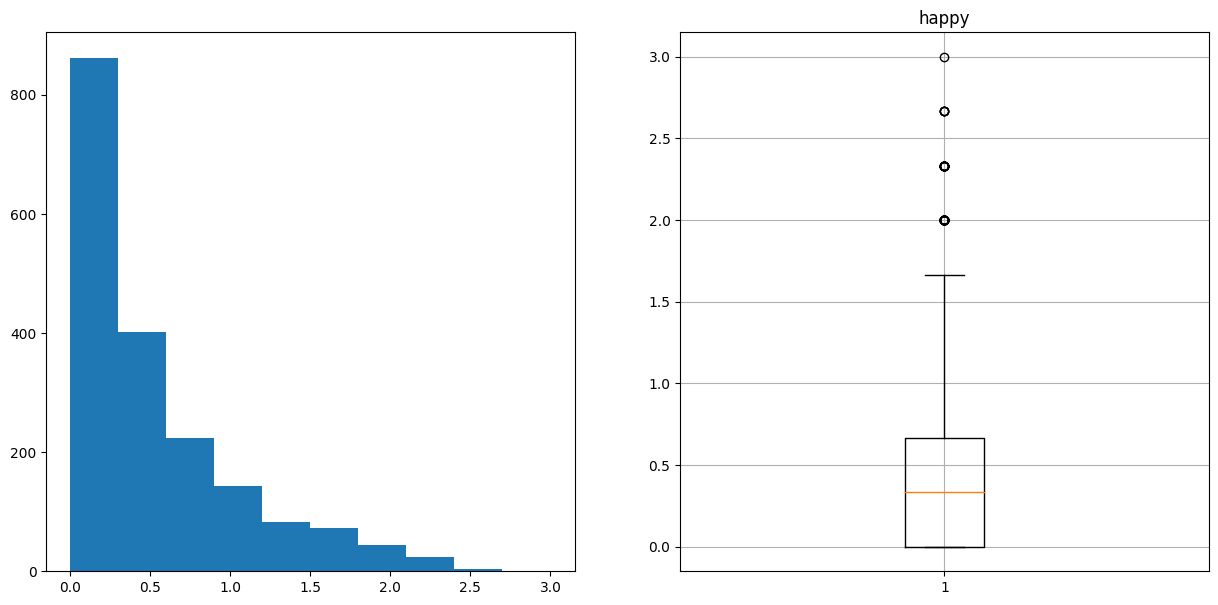

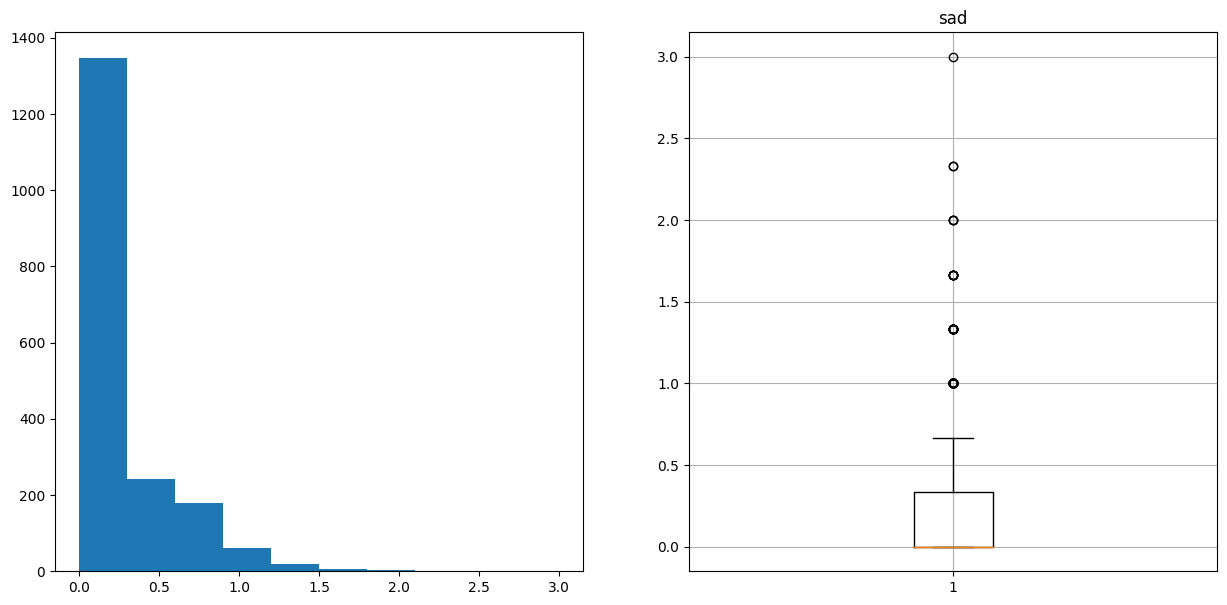

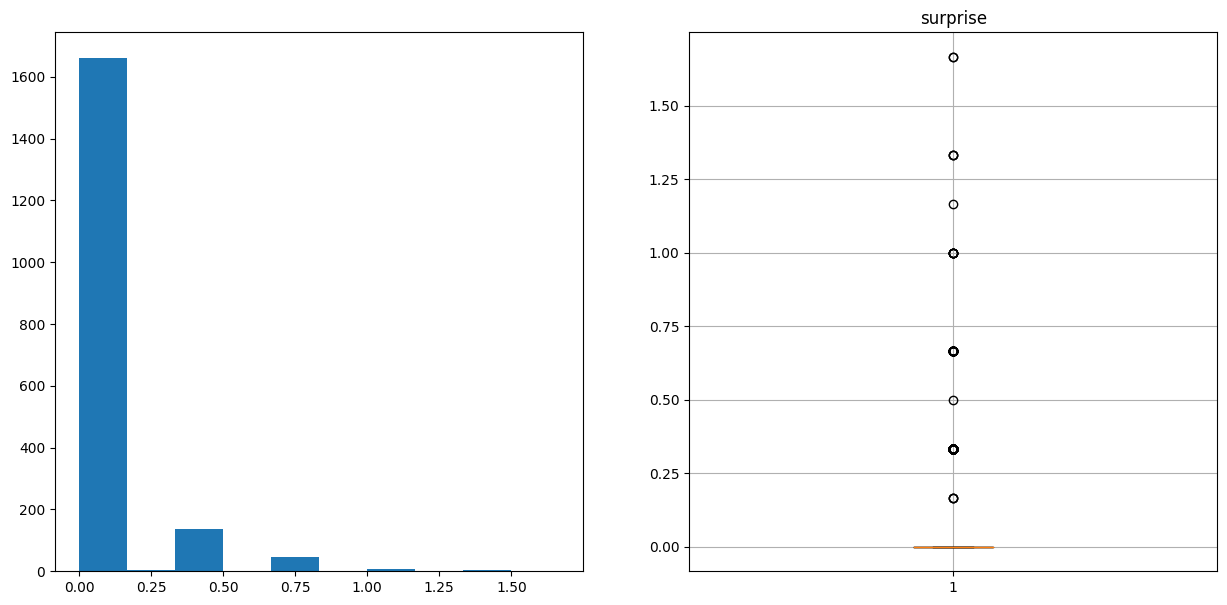

In [87]:
for class_name in CLASSES_NAMES:
    show_distribution(val_mod_csv, class_name)

In [88]:
def make_audio_path(yyid: str, start_time: float, end_time: float, subset_name="Train_modified"):
    start_time = str(round(start_time, 4))
    end_time = str(round(end_time, 4))

    if len(start_time.split(".")[-1]) < 4:
       start_time += "0" * (4 - len(start_time.split(".")[-1]))
    if len(end_time.split(".")[-1]) < 4:
       end_time += "0" * (4 - len(end_time.split(".")[-1]))
    
    audio_path = AUDIO_DIR / subset_name / f"{yyid}_{start_time}_{end_time}.wav"
    return audio_path

def get_all_audios_paths(csv: pd.DataFrame, subset_name="Train_modified"):
    all_audios_paths = list()
    for row in tqdm(csv[['video', "start_time", "end_time"]].values):
        all_audios_paths.append(make_audio_path(*row, subset_name=subset_name))
    return all_audios_paths

In [89]:
import librosa
tqdm.pandas()

train_mod_csv["audio_path"] = get_all_audios_paths(train_mod_csv)
train_mod_csv["durations"] = train_mod_csv["audio_path"].progress_apply(lambda path: librosa.get_duration(filename=path))

100%|██████████| 16274/16274 [00:00<00:00, 28607.99it/s]


anger
disgust
fear
happy
sad
surprise


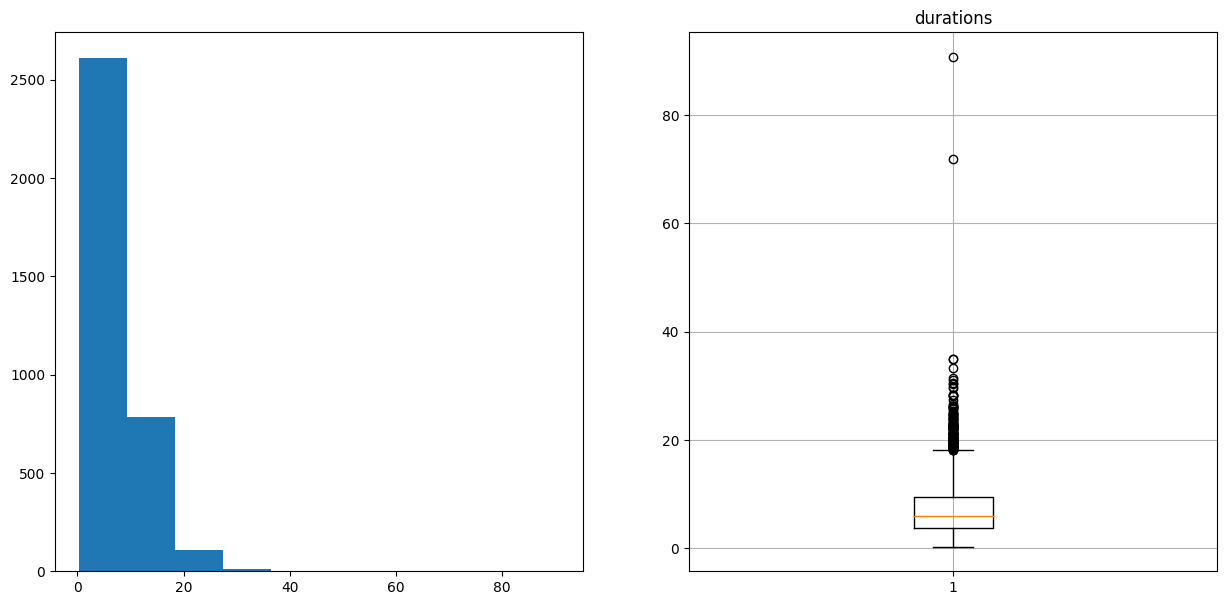

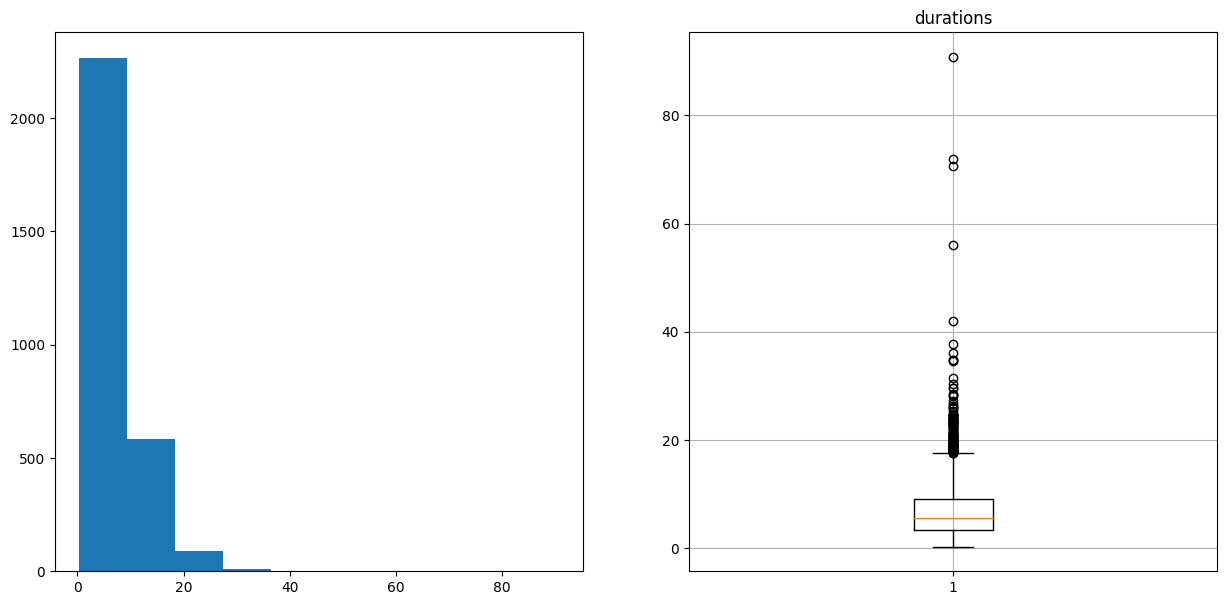

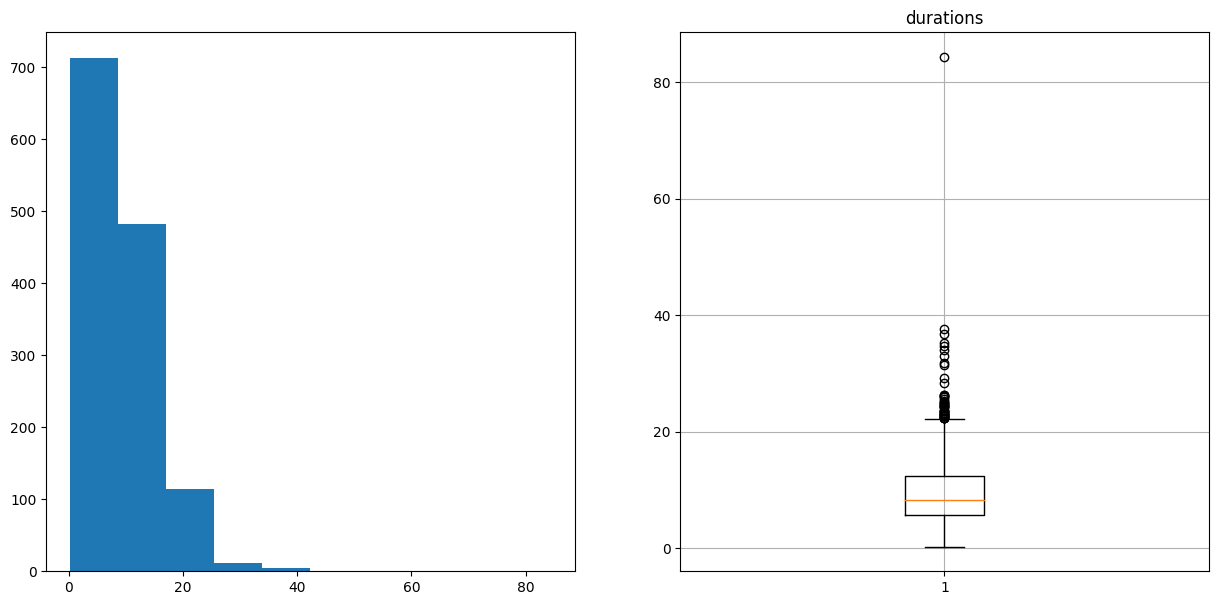

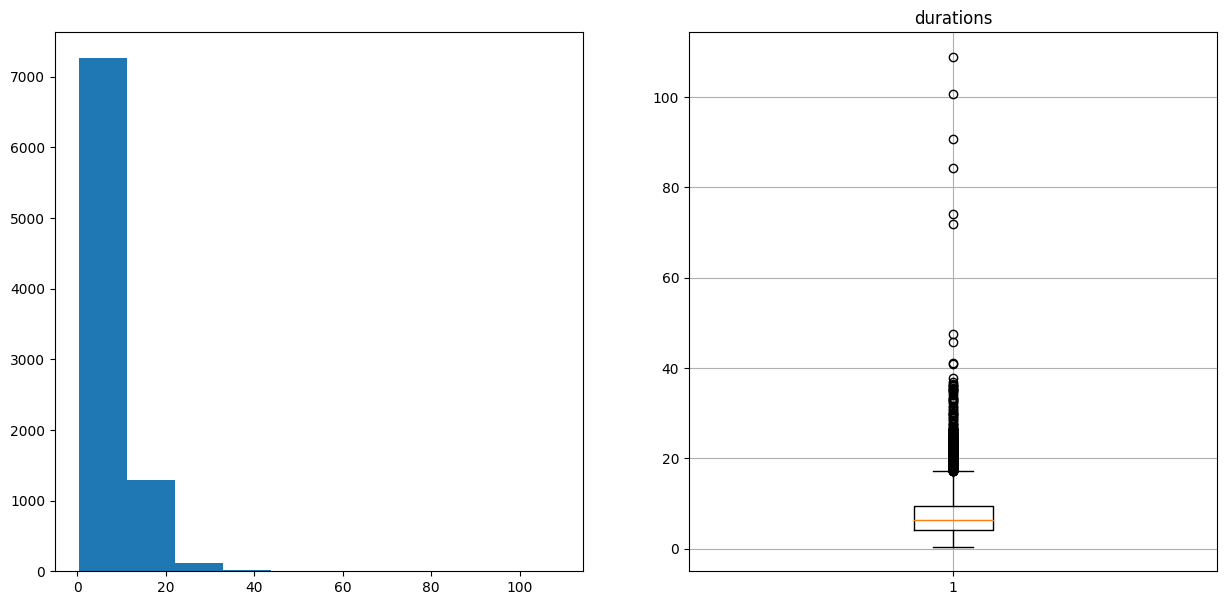

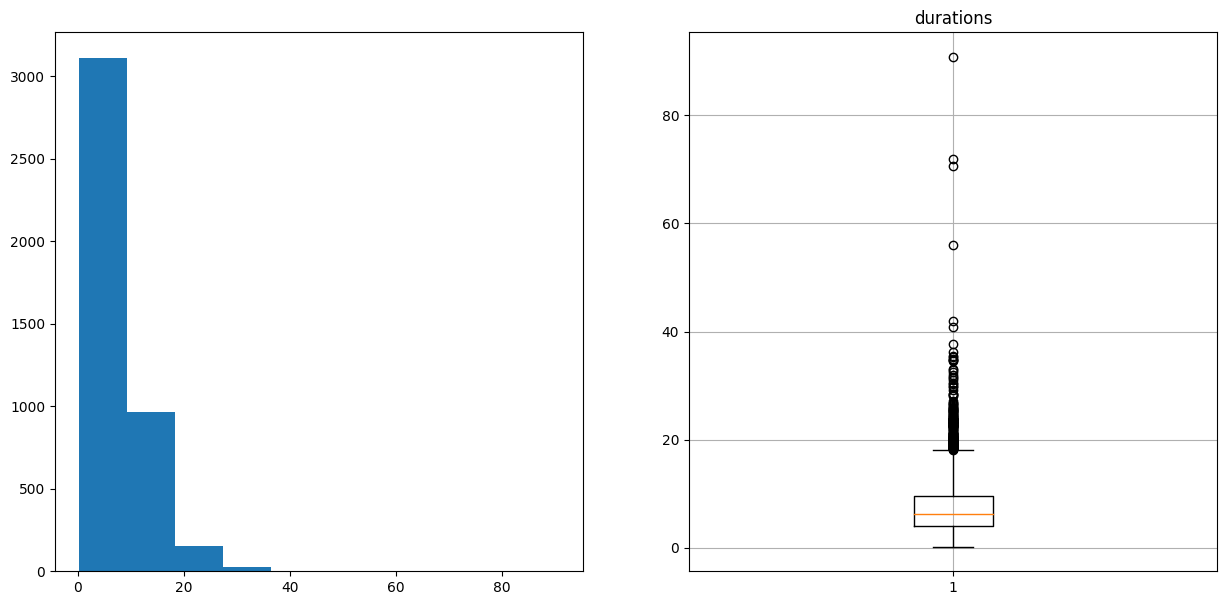

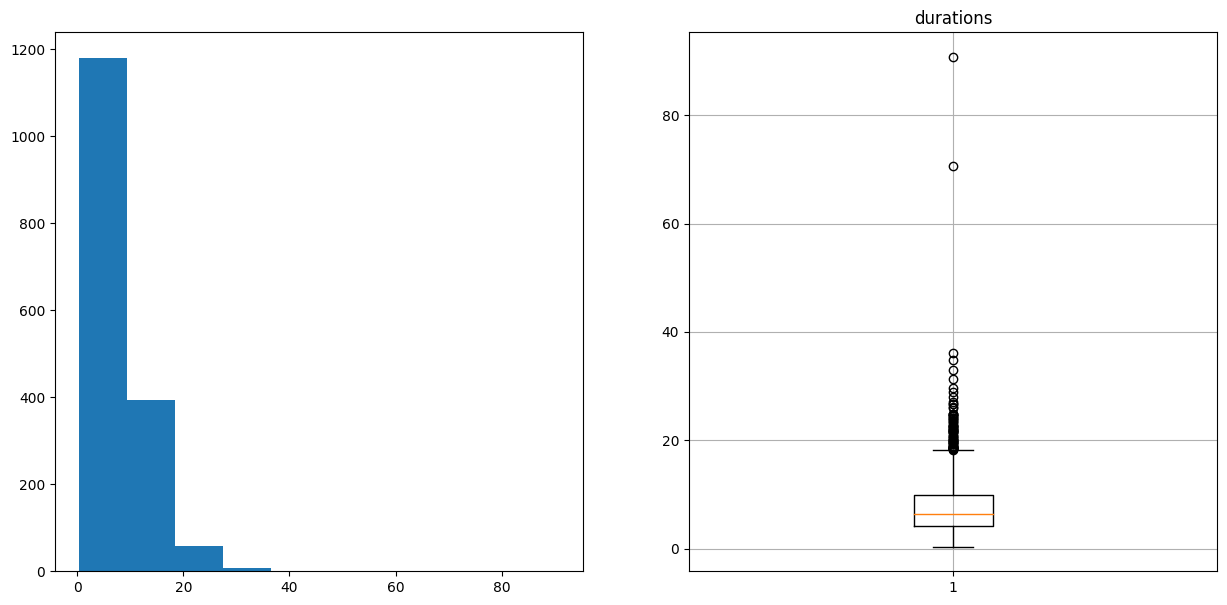

In [90]:
for class_name in CLASSES_NAMES:
    print(class_name)
    show_distribution(train_mod_csv[train_mod_csv[class_name] > 0.0], "durations")

In [91]:
val_mod_csv["audio_path"] = get_all_audios_paths(val_mod_csv, subset_name="Val_modified")
val_mod_csv["durations"] = val_mod_csv["audio_path"].progress_apply(lambda path: librosa.get_duration(filename=path))

100%|██████████| 1861/1861 [00:00<00:00, 25273.19it/s]


anger
disgust
fear
happy
sad
surprise


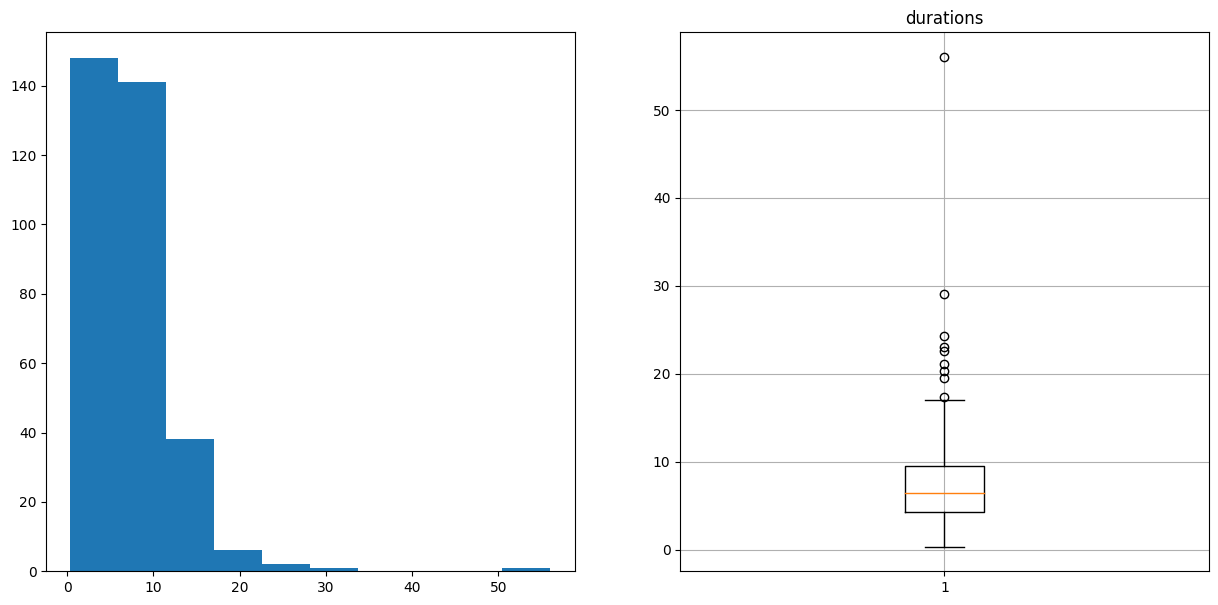

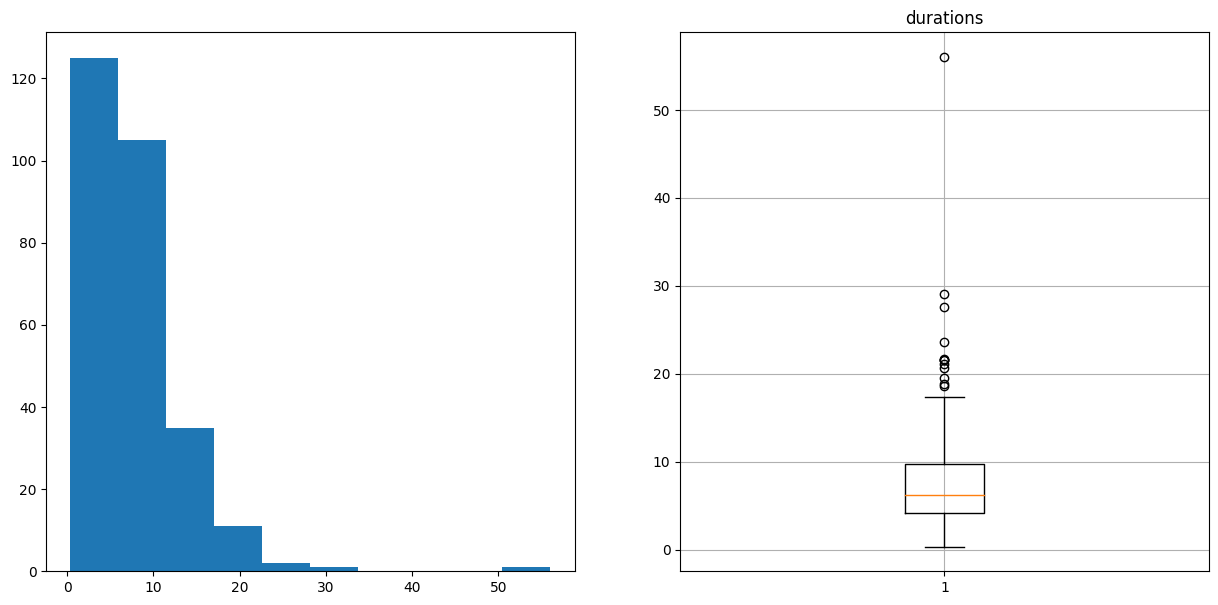

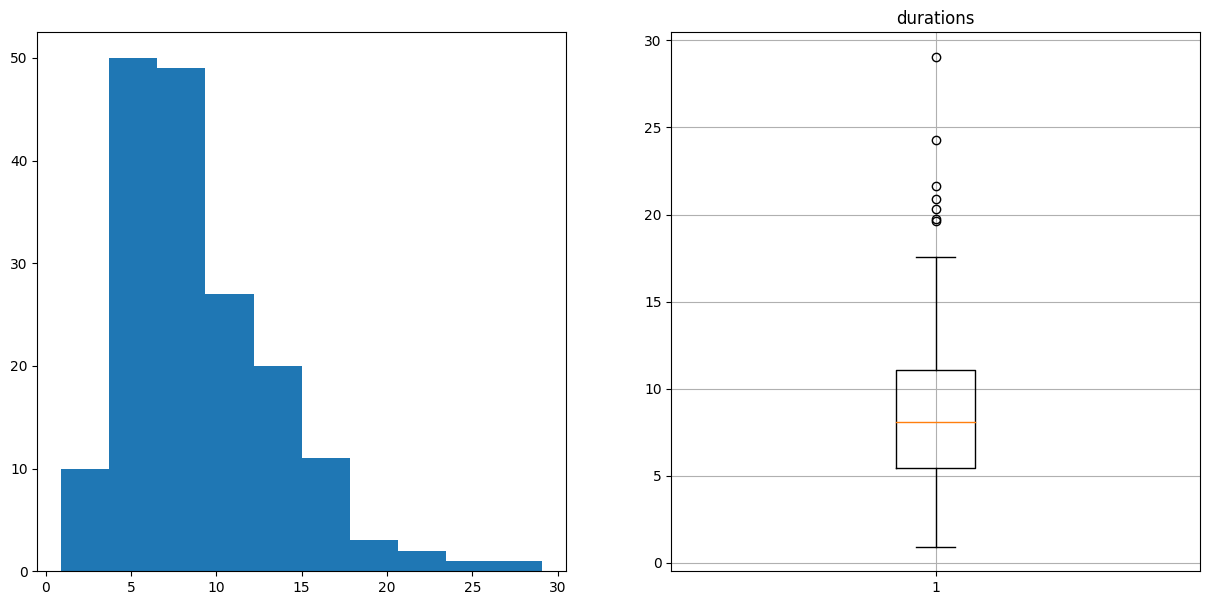

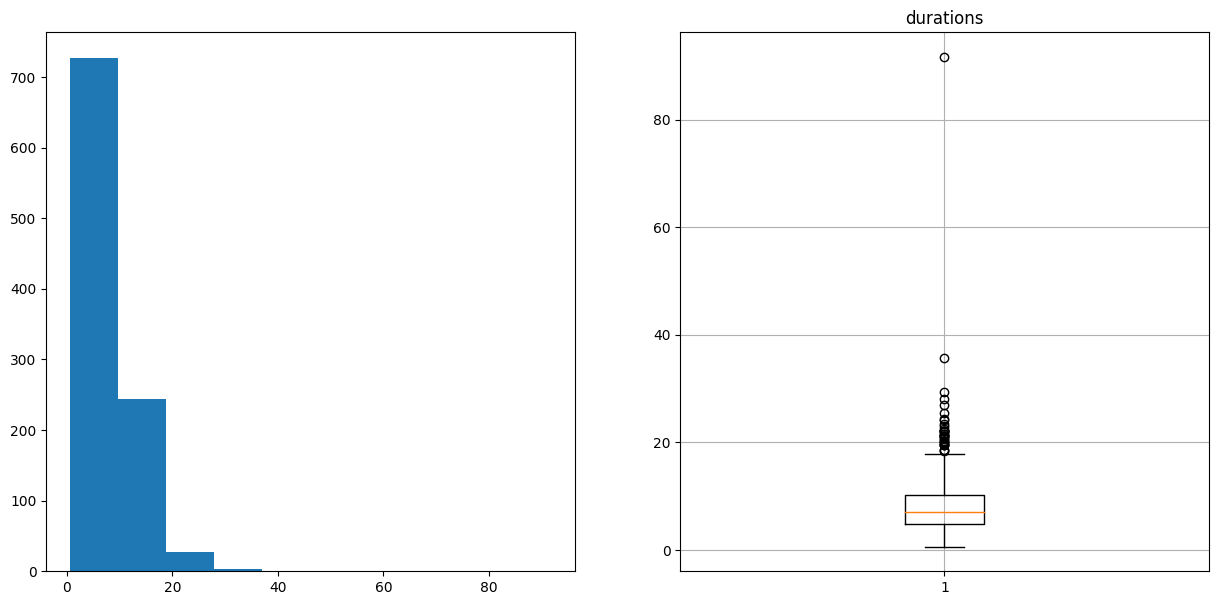

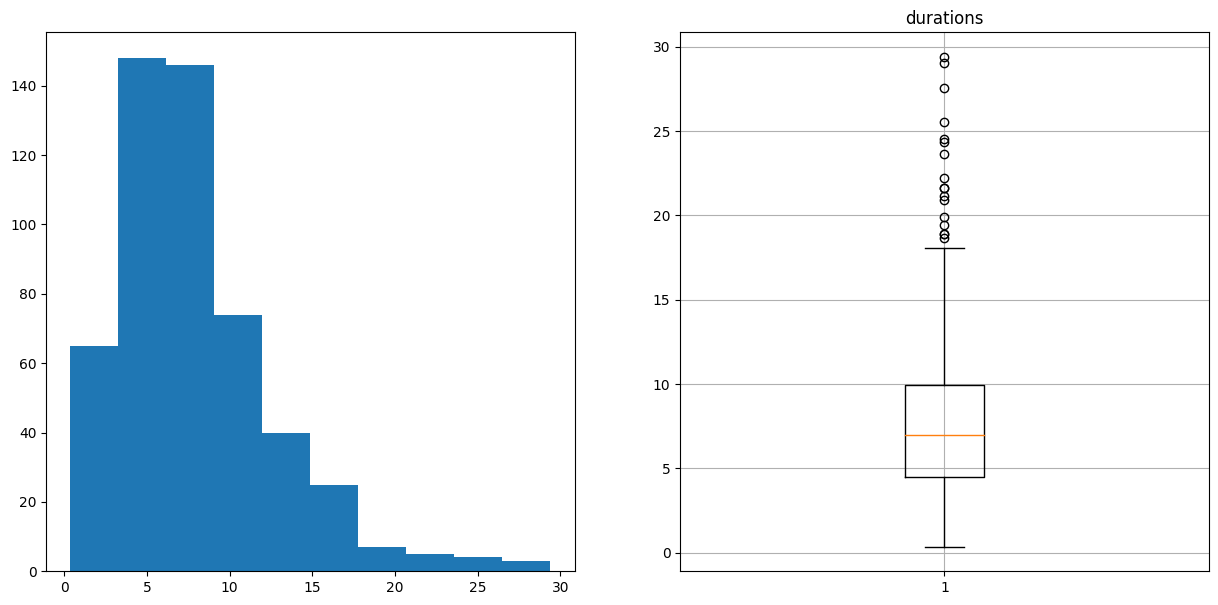

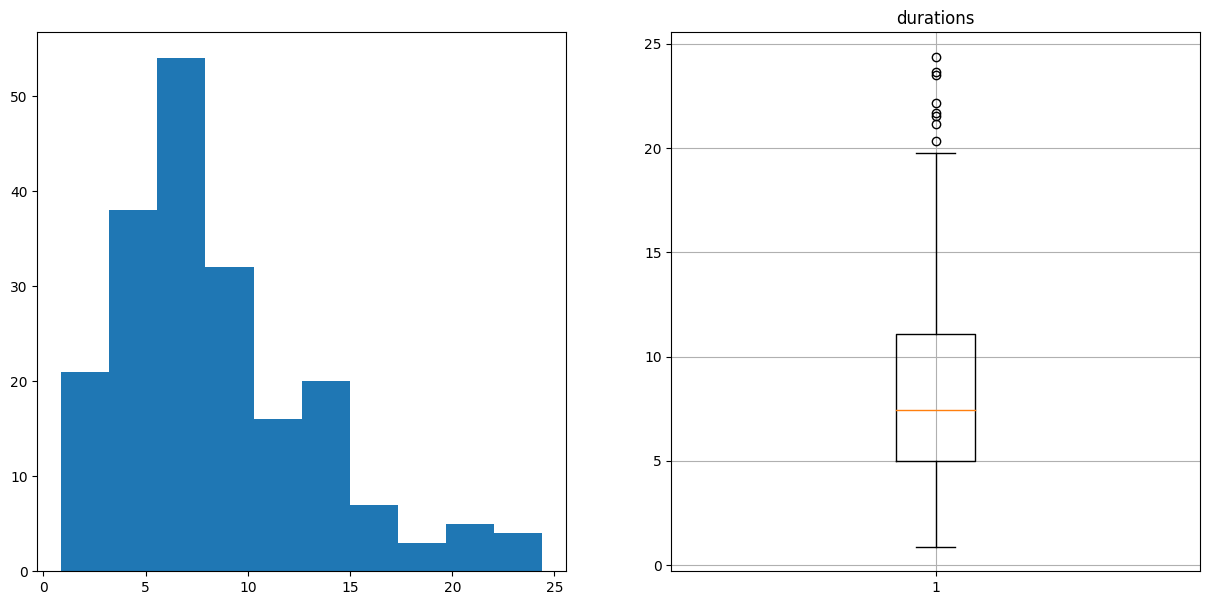

In [92]:
for class_name in CLASSES_NAMES:
    print(class_name)
    show_distribution(val_mod_csv[val_mod_csv[class_name] > 0.0], "durations")

In [93]:
test_mod_csv["audio_path"] = get_all_audios_paths(test_mod_csv, subset_name="Test_modified")
test_mod_csv["durations"] = test_mod_csv["audio_path"].progress_apply(lambda path: librosa.get_duration(filename=path))

100%|██████████| 4653/4653 [00:00<00:00, 26082.56it/s]


anger
disgust
fear
happy
sad
surprise


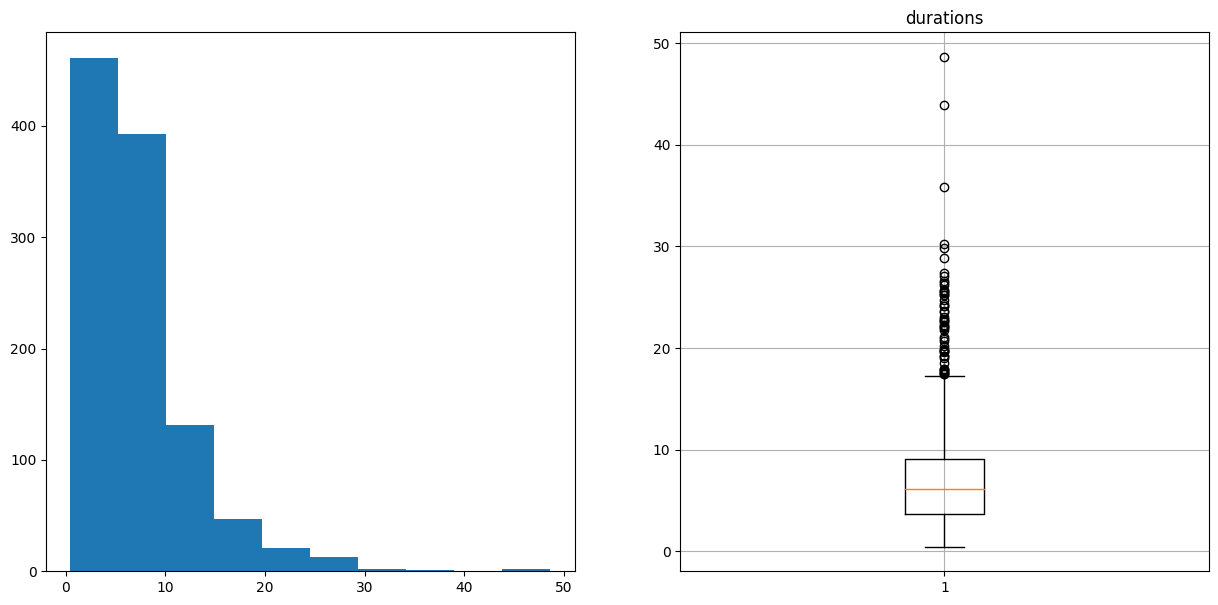

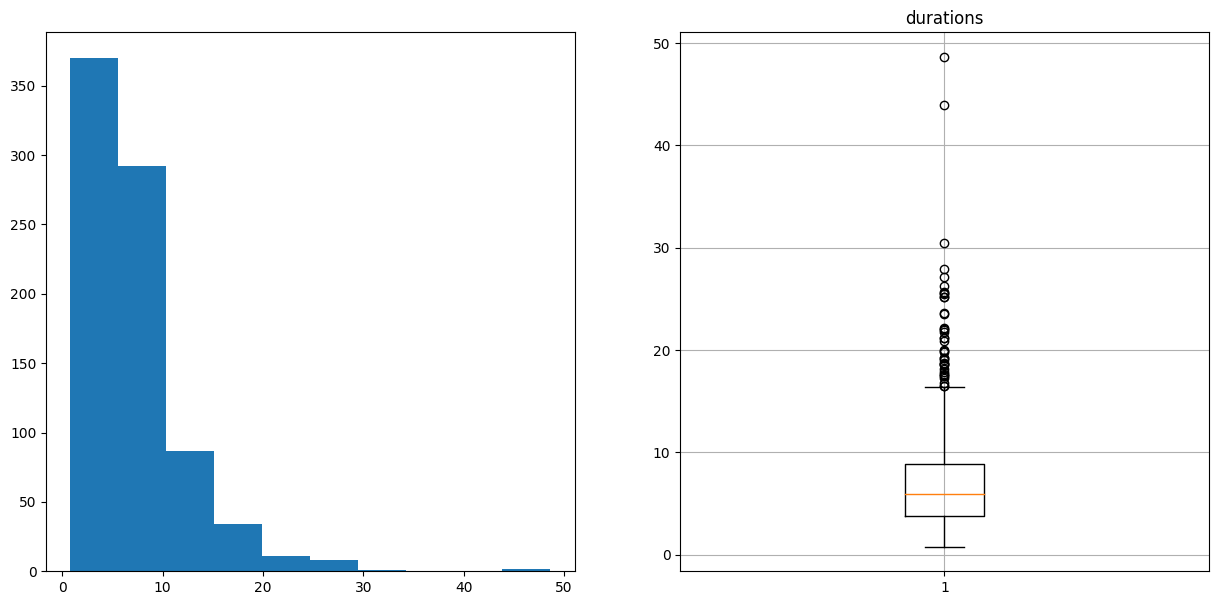

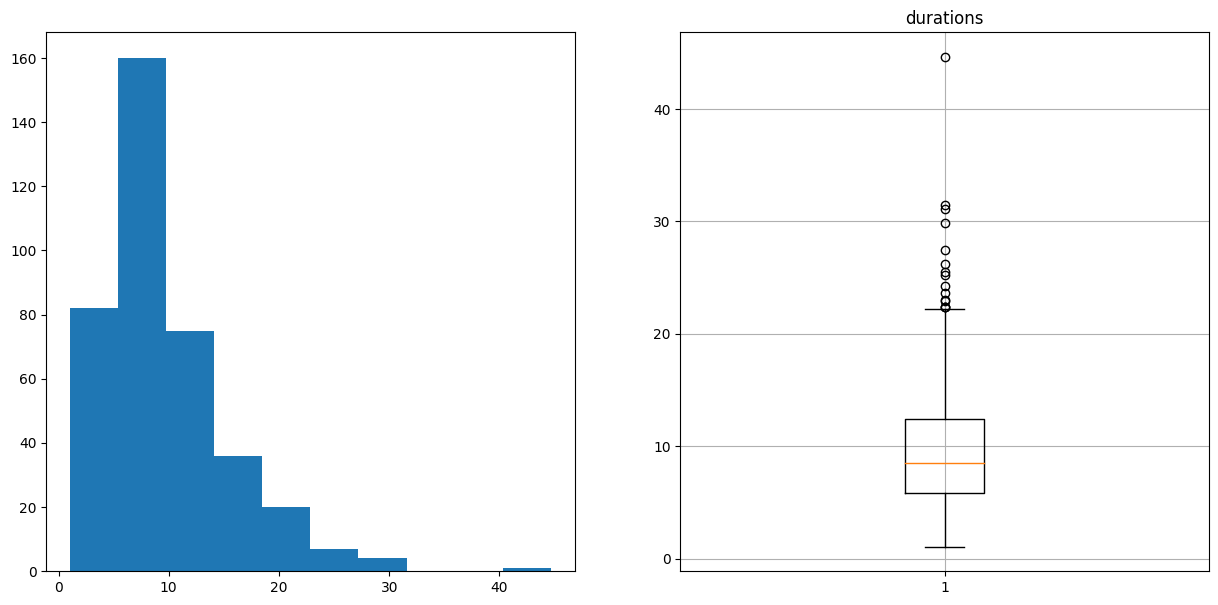

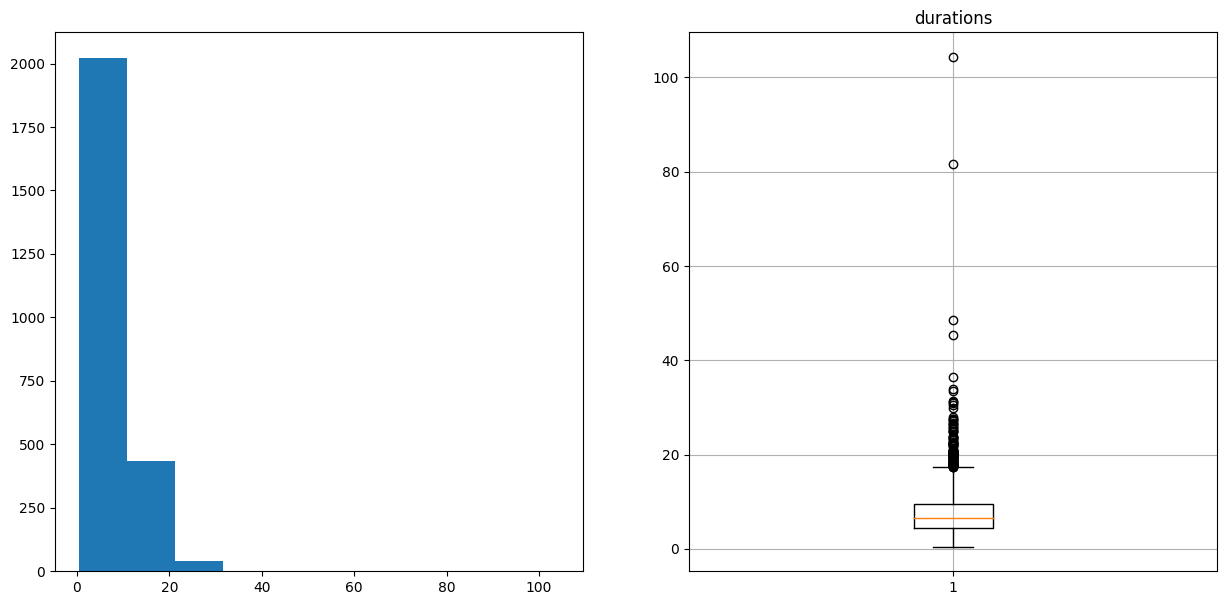

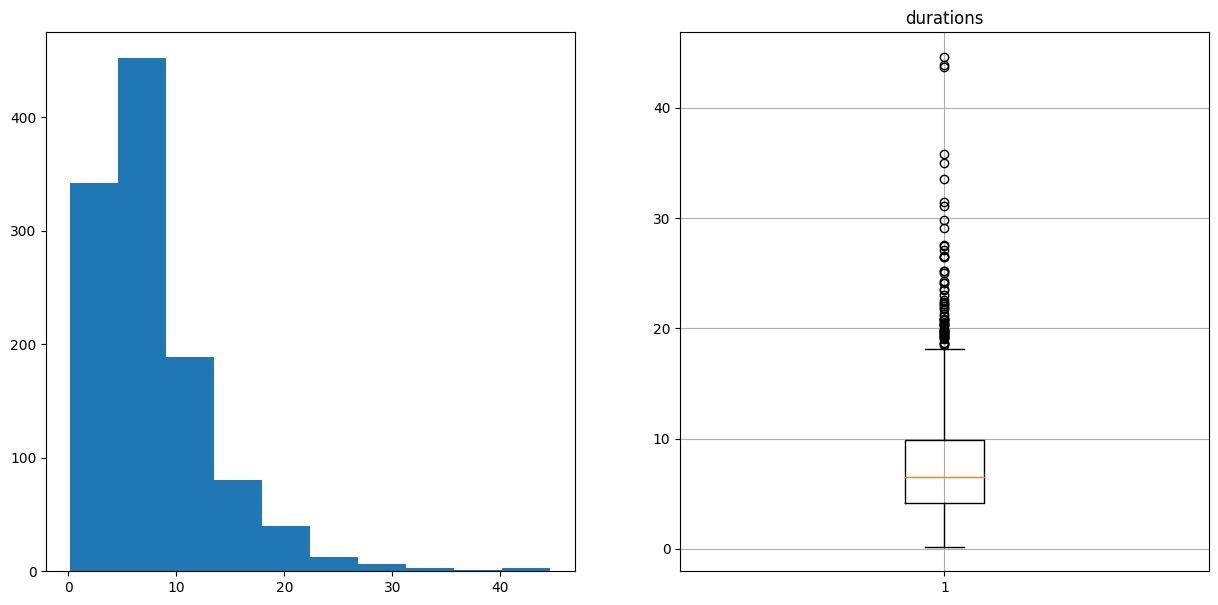

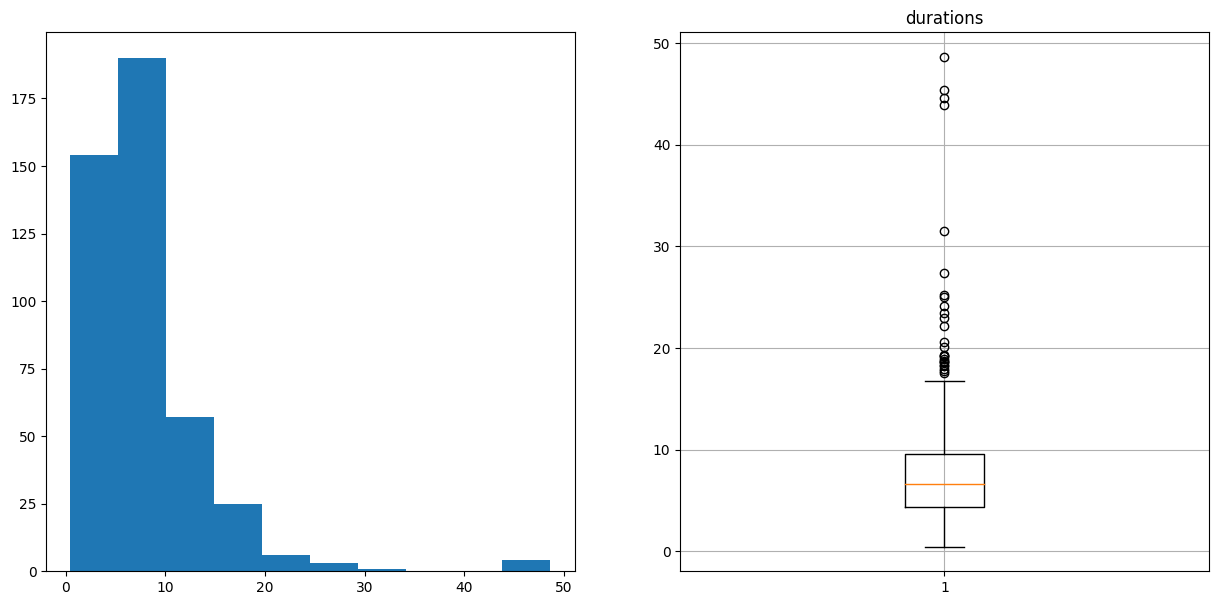

In [94]:
for class_name in CLASSES_NAMES:
    print(class_name)
    show_distribution(test_mod_csv[test_mod_csv[class_name] > 0.0], "durations")